***1. Create portfolio for the given stocks: Google, amazon and tesla for the last 10 years.
    2. Visualize the expected returns on the 10 years series.
    3. Evaluate the annual daily mean, correlation,Sharpe ratio and daily standard mean.
    4. Formulate the Markowitz frontier.
    5. Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.(Assuming Greater Return of
investment) ***

In [1]:
from pandas_datareader import data as dr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stocks = ['GOOG','TSLA','AMZN']

In [4]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2012-12-31',end='2022-04-09')['Adj Close']

In [9]:
stock_data.head()

,GOOG,TSLA,AMZN
Date,,,
2012-12-31,17.618462,6.774,12.5435
2013-01-02,18.013729,7.072,12.8655
2013-01-03,18.024191,6.954,12.9240
2013-01-04,18.380356,6.880,12.9575
2013-01-07,18.300158,6.868,13.4230


In [10]:
stock_data.tail()

,GOOG,TSLA,AMZN
Date,,,
2022-04-04,143.642502,1145.449951,168.346497
2022-04-05,141.063004,1091.260010,164.054993
2022-04-06,137.175995,1045.760010,158.755997
2022-04-07,136.464996,1057.260010,157.784500
2022-04-08,134.010498,1025.489990,154.460495


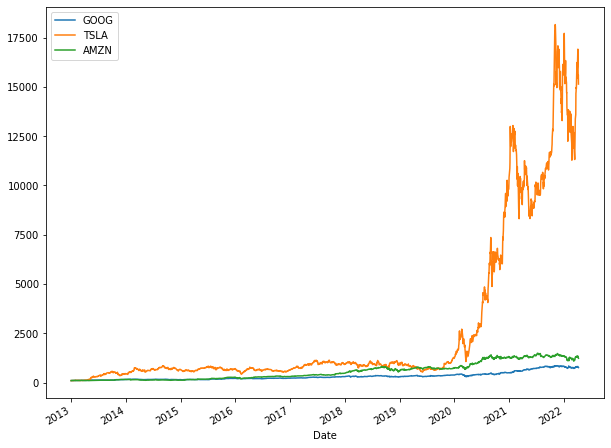

In [11]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

In [12]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,GOOG,TSLA,AMZN
Date,,,
2012-12-31,NaN,NaN,NaN
2013-01-02,0.022187,0.043052,0.025347
2013-01-03,0.000581,-0.016826,0.004537
2013-01-04,0.019568,-0.010698,0.002589
2013-01-07,-0.004373,-0.001746,0.035295
...,...,...,...
2022-04-04,0.020698,0.054596,0.028844
2022-04-05,-0.018121,-0.048465,-0.025823
2022-04-06,-0.027942,-0.042589,-0.032833


In [13]:
logReturns.mean() * 250 

GOOG    0.217235
TSLA    0.537455
AMZN    0.268815
dtype: float64

In [14]:
logReturns.cov() * 250 

,GOOG,TSLA,AMZN
GOOG,0.065298,0.048897,0.047178
TSLA,0.048897,0.311594,0.059105
AMZN,0.047178,0.059105,0.092671


In [15]:
stock_data.corr()

,GOOG,TSLA,AMZN
GOOG,1.000000,0.915697,0.933399
TSLA,0.915697,1.000000,0.820066
AMZN,0.933399,0.820066,1.000000


In [16]:
numberOfStocks = len(stocks)
numberOfStocks

3

In [17]:
weights = np.random.random(numberOfStocks)
weights = weights/np.sum(weights)

In [18]:
weights

array([0.40270787, 0.03431418, 0.56297794])

In [19]:
(weights * logReturns.mean()).sum() * 250

0.25726155190189437

In [20]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.2556464928716088

In [22]:
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []
weightList2= []

# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    weightList2.append(weights[2])

    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for Google
weightList1 = np.array(weightList1) #Weights for Tesla
weightList2 = np.array(weightList2) #weight for Amazon
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of Google": weightList0, "Weight of Tesla": weightList1,"Weight of Amazon": weightList2, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of Google,Weight of Tesla,Weight of Amazon,Expected Return,Standard deviation
0,0.050309,0.416682,0.533009,0.378158,0.333807
1,0.312530,0.004639,0.682832,0.253941,0.265039
2,0.164133,0.380721,0.455146,0.362626,0.315857
3,0.437233,0.467566,0.095201,0.371870,0.332604
4,0.312553,0.603082,0.084365,0.414706,0.383802


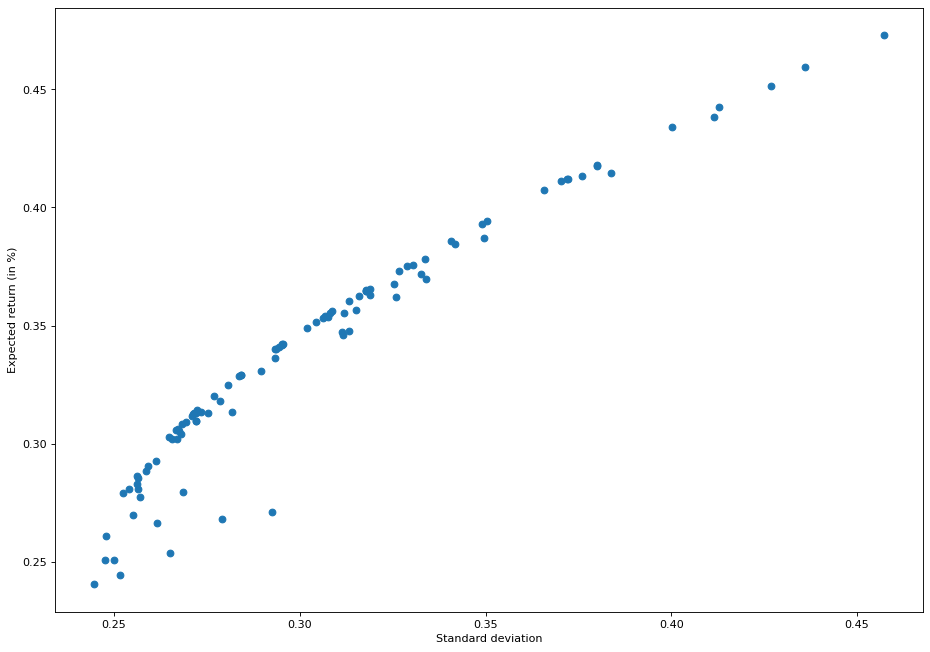

In [23]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [24]:
df[(df["Expected Return"]>0.11) & (df["Expected Return"]< 0.12)].sort_values(by=['Expected Return'])

,Weight of Google,Weight of Tesla,Weight of Amazon,Expected Return,Standard deviation


In [25]:
df[(df["Expected Return"]>0.11)].sort_values(by=['Expected Return']).head(10)

,Weight of Google,Weight of Tesla,Weight of Amazon,Expected Return,Standard deviation
5,0.708823,0.030711,0.260466,0.240504,0.244711
96,0.488738,0.003827,0.507435,0.244634,0.251549
74,0.498408,0.027950,0.473642,0.250616,0.249911
92,0.775825,0.081231,0.142944,0.250620,0.247493
1,0.312530,0.004639,0.682832,0.253941,0.265039
48,0.545816,0.075925,0.378259,0.261058,0.247866
97,0.321306,0.052777,0.625917,0.266420,0.261638
43,0.165999,0.030150,0.803851,0.268353,0.279123
52,0.404208,0.080859,0.514933,0.269688,0.255021
79,0.068126,0.021172,0.910702,0.270989,0.292534


In [26]:
df["Expected Return"].mean()

0.3392978000225078

In [27]:
df["Expected Return"].sort_values().median()

0.340722028309541

In [28]:
df[(df["Expected Return"]>0.135)].sort_values(by=['Expected Return'])

,Weight of Google,Weight of Tesla,Weight of Amazon,Expected Return,Standard deviation
5,0.708823,0.030711,0.260466,0.240504,0.244711
96,0.488738,0.003827,0.507435,0.244634,0.251549
74,0.498408,0.027950,0.473642,0.250616,0.249911
92,0.775825,0.081231,0.142944,0.250620,0.247493
1,0.312530,0.004639,0.682832,0.253941,0.265039
...,...,...,...,...,...
7,0.192026,0.667632,0.140342,0.438263,0.411433
46,0.076022,0.661452,0.262526,0.442587,0.412820
27,0.108541,0.700256,0.191203,0.451333,0.426812
82,0.042502,0.717087,0.240411,0.459261,0.435917


In [33]:
df.loc[15]

Weight of Google      0.628882
Weight of Tesla       0.208887
Weight of Amazon      0.162230
Expected Return       0.292493
Standard deviation    0.261418
Name: 15, dtype: float64

In [31]:
0.628+0.208+0.162

0.998